#### Customer Call Center Performance Analysis

##### Data Overview
The dataset has 5,000 entries and 10 columns. Here's a summary of the columns:

- Call Id: Identifier for each call (e.g., ID0001)
- Agent: Name of the agent who handled the call
- Date: Date of the call (stored as a string)
- CallStartTime: Time when the call started (stored as a string)
- Topic: The topic discussed during the call (e.g.,Contract related, Technical Support)
- Answered (Y/N): Whether the call was answered or not (Y for answered, N for unanswered)
- Resolved: Whether the issue was resolved (Y for yes, N for no)
- Speed of answer in seconds: The time taken to answer the call
-CallEndTime: Time when the call ended (stored as a string)
- AvgTalkDuration (in seconds): Average talk duration of the call 
- Satisfaction rating: A rating given for customer satisfaction


##### Objective:

The goal of this project is to analyze customer call center data to gain insights into the following:

- Agent Performance: Identify top-performing agents based on factors like call resolution, speed of answer, and customer satisfaction ratings.
- Call Topic Analysis: Determine which topics are most frequently discussed and how they impact call outcomes (answered, resolved, etc.).
- Customer Satisfaction: Analyze the factors that influence customer satisfaction scores, such as speed of answer and resolution status.
- Operational Efficiency: Evaluate how efficiently the call center operates, considering metrics like average talk duration and speed of answering.


##### STEP 1 : Data Loading and Inspection



In [200]:
import pandas as pd

In [201]:
data =pd.read_excel("/Users/vaishnavipullakhandam/Desktop/github/excel/Call-Center-Data.xlsx")

# Display the first few rows of the dataset
data.head()

,Call Id,Agent,Date,CallStartTime,Topic,Answered (Y/N),Resolved,Speed of answer (in seconds),CallEndTime,AvgTalkDuration (inseconds),Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,5.605679,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,5.585883,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,6.022595,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,6.041392,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,6.192362,3.0


In [202]:
# Display basic information about the data using the info method

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Call Id                       5000 non-null   object 
 1   Agent                         5000 non-null   object 
 2   Date                          5000 non-null   object 
 3   CallStartTime                 5000 non-null   object 
 4   Topic                         5000 non-null   object 
 5   Answered (Y/N)                5000 non-null   object 
 6   Resolved                      5000 non-null   object 
 7   Speed of answer (in seconds)  4054 non-null   float64
 8   CallEndTime                   4054 non-null   object 
 9   AvgTalkDuration (inseconds)   5000 non-null   float64
 10  Satisfaction rating           4054 non-null   float64
dtypes: float64(3), object(8)
memory usage: 429.8+ KB


##### STEP 2 : Data Cleaning

Data cleaning is a crucial step in the data analysis process, ensuring that the dataset is accurate and ready for analysis. During this step, we handle missing values, fix data types, and address any inconsistencies in the data.

- 1. Handling Missing Values:
Columns like Speed of answer in seconds, AvgTalkDuration, and Satisfaction rating contain missing values. We'll decide how to handle them (e.g., filling with averages, dropping rows, etc.).

- If the column is important for analysis and the na values make up less than 5-10% of the total rows, replace with mean or median. 

-  If the column is not important and the na values make up over 20-30% of the rows, then it is better to drop them. Otherwise, filling too many values could distort the data.


- 2. Date Type Formatting
The Date and Time columns are currently in string format. We need to convert them to proper datetime objects so they can be used for time-based analysis. Also, Satisfacting rating should be in integer format.


- 3. Categorical Data:
Columns like Answered (Y/N) and Resolved are categorical variables but are stored as strings. We might consider encoding these values as 0/1 or keeping them as categories for better analysis.



In [203]:
# Step 2.1.1 : Checking Missing Values

missing_values = data.isnull().sum()
print(missing_values)

Call Id                           0
Agent                             0
Date                              0
CallStartTime                     0
Topic                             0
Answered (Y/N)                    0
Resolved                          0
Speed of answer (in seconds)    946
CallEndTime                     946
AvgTalkDuration (inseconds)       0
Satisfaction rating             946
dtype: int64


In [204]:
# Step 2.1.2 : Handling Missing Values
'''
We have missing values in the following columns:

Speed of answer (in seconds) → 946 missing values
CallEndTime → 946 missing values
Satisfaction rating → 946 missing values

'''

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Display missing percentage
print(missing_percentage)


Call Id                          0.00
Agent                            0.00
Date                             0.00
CallStartTime                    0.00
Topic                            0.00
Answered (Y/N)                   0.00
Resolved                         0.00
Speed of answer (in seconds)    18.92
CallEndTime                     18.92
AvgTalkDuration (inseconds)      0.00
Satisfaction rating             18.92
dtype: float64


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

67.52072027627035
68.0
Original Mean (Mean1): 3.4035520473606313
Mean after filling with Median (Mean2): 3.3272
Mean after filling with Mode (Mean3): 3.3272


/var/folders/52/ns3sdnhj22n2q3hsq7mpbgv40000gn/T/ipykernel_93508/2207114608.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Satisfaction rating'].fillna(median_value, inplace=True)
/var/folders/52/ns3sdnhj22n2q3hsq7mpbgv40000gn/T/ipykernel_93508/2207114608.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

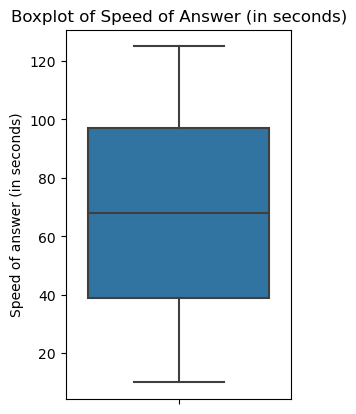

In [206]:
'''
Step 2.1.3: Deciding How to Handle Missing Values

Speed of answer (in seconds) and Satisfaction rating are important for analysis, so we should fill them with an appropriate value (mean or median).

CallEndTime is not essential because we already have CallStartTime and AvgTalkDuration. Since it has 18.92% missing values, we should drop this column to avoid distortion.

'''

# Boxplot for Speed of answer (in seconds)
plt.subplot(1, 2, 1)
sns.boxplot(y=data["Speed of answer (in seconds)"])
plt.title("Boxplot of Speed of Answer (in seconds)")


# Check if Speed Of Answer is a normal distribution. 
'''

In a normal distribution, mean ≈ median, meaning they represent the data equally well.
Since there are no extreme outliers (as seen in the boxplot), the mean won't be heavily skewed.
Using the mean ensures that the overall distribution remains unchanged.

'''
checking_mean=data["Speed of answer (in seconds)"].mean()
print(checking_mean)
checking_median=data["Speed of answer (in seconds)"].median()
print(checking_median)

'''
Satisfaction rating is a categorical column because it decides the satisfaction of the customer, we have to be careful not to influence the actual mean while replacing the Nan values.
'''

# Step 1: Compute original mean
mean1 = data['Satisfaction rating'].mean()

# Step 2: Fill missing values with median and compute new mean
median_value = data['Satisfaction rating'].median()
df_median = data.copy()
df_median['Satisfaction rating'].fillna(median_value, inplace=True)
mean2 = df_median['Satisfaction rating'].mean()

# Step 3: Fill missing values with mode and compute new mean
mode_value = data['Satisfaction rating'].mode()[0]  # Mode can return multiple values, so we take the first one
df_mode = data.copy()
df_mode['Satisfaction rating'].fillna(mode_value, inplace=True)
mean3 = df_mode['Satisfaction rating'].mean()

# Step 4: Compare Mean1, Mean2, and Mean3
print("Original Mean (Mean1):", mean1)
print("Mean after filling with Median (Mean2):", mean2)
print("Mean after filling with Mode (Mean3):", mean3)



In [207]:
'''
Step 2.1.4: Handling Missing Values 

We can see that mean ≈ median so we can use mean to replace the Nan values in Speed Of Answer column.
'''

data['Speed of answer (in seconds)'].fillna(data['Speed of answer (in seconds)'].mean(), inplace=True)

# Drop 'CallEndTime' column
data.drop(columns=['CallEndTime'], inplace=True)


'''
Since both median and mode give almost the same mean after filling, the median is usually the safer choice in this case. The median is robust to outliers, meaning it won’t get affected if there are extreme values in the dataset.
'''

data['Satisfaction rating'].fillna(median_value, inplace=True)



/var/folders/52/ns3sdnhj22n2q3hsq7mpbgv40000gn/T/ipykernel_93508/3826096527.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Speed of answer (in seconds)'].fillna(data['Speed of answer (in seconds)'].mean(), inplace=True)
/var/folders/52/ns3sdnhj22n2q3hsq7mpbgv40000gn/T/ipykernel_93508/3826096527.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

In [208]:
'''
Step 2.1.4 : Recheck the data
'''

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Call Id                       5000 non-null   object 
 1   Agent                         5000 non-null   object 
 2   Date                          5000 non-null   object 
 3   CallStartTime                 5000 non-null   object 
 4   Topic                         5000 non-null   object 
 5   Answered (Y/N)                5000 non-null   object 
 6   Resolved                      5000 non-null   object 
 7   Speed of answer (in seconds)  5000 non-null   float64
 8   AvgTalkDuration (inseconds)   5000 non-null   float64
 9   Satisfaction rating           5000 non-null   float64
dtypes: float64(3), object(7)
memory usage: 390.8+ KB


,Call Id,Agent,Date,CallStartTime,Topic,Answered (Y/N),Resolved,Speed of answer (in seconds),AvgTalkDuration (inseconds),Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,5.605679,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,5.585883,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,6.022595,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,6.041392,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,6.192362,3.0


In [209]:
'''
Step 2.2 : Data Type Formatting

'''

# Step 2.2.1: Changing Date column to a proper date format (YYYY-MM-DD)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
#Convert 'CallStartTime' to time format
data['CallStartTime'] = pd.to_datetime(data['CallStartTime'], format='%H:%M:%S', errors='coerce').dt.time


# Convert 'Satisfaction rating' to integer
data['Satisfaction rating'] = data['Satisfaction rating'].astype(int)


In [210]:
'''
Step 2.3 : Turning Categorical Values into 1/0

From YES/NO to 1/0
'''

# This step will be revisited later if we require it for our analysis. As of right now, we are satisfied with the Categorical Values YES/NO!

data['Answered (Y/N)'] = data['Answered (Y/N)'].astype('category')
data['Resolved'] = data['Resolved'].astype('category')




In [211]:
# This is the cleaned dataset

data.head()

,Call Id,Agent,Date,CallStartTime,Topic,Answered (Y/N),Resolved,Speed of answer (in seconds),AvgTalkDuration (inseconds),Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,5.605679,3
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,5.585883,3
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,6.022595,3
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,6.041392,2
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,6.192362,3


##### STEP 3 : EDA
Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to identify patterns, detect anomalies, test hypotheses, and check assumptions before building models or making decisions.

EDA helps answer key questions about the data:
- What are the distributions of numerical variables?
- Are there any missing values or outliers affecting insights?
- How do different variables relate to each other?
- What trends, patterns, or correlations exist?



In [212]:
# Step 3.1 : Summary Statistics

description=data.select_dtypes(include=['number']).describe()
print(description)
print()
# Checking missing values using .isnull().sum()

print(data.isnull().sum())


       Speed of answer (in seconds)  AvgTalkDuration (inseconds)  \
count                   5000.000000                  5000.000000   
mean                      67.520720                     8.699002   
std                       30.247806                     1.888072   
min                       10.000000                     5.402320   
25%                       45.000000                     7.092731   
50%                       67.520720                     8.674865   
75%                       90.000000                    10.367926   
max                      125.000000                    11.957409   

       Satisfaction rating  
count          5000.000000  
mean              3.327200  
std               1.102898  
min               1.000000  
25%               3.000000  
50%               3.000000  
75%               4.000000  
max               5.000000  

Call Id                         0
Agent                           0
Date                            0
CallStartTime          

In [213]:
# Step 3.2 : Count of unique values for categorical columns

categorical_cols = ["Agent", "Topic", "Answered (Y/N)", "Resolved"]
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())



Unique values in Agent:
Agent
Jim        666
Martha     638
Diane      633
Dan        633
Becky      631
Greg       624
Joe        593
Stewart    582
Name: count, dtype: int64

Unique values in Topic:
Topic
Streaming            1022
Technical Support    1019
Payment related      1007
Contract related      976
Admin Support         976
Name: count, dtype: int64

Unique values in Answered (Y/N):
Answered (Y/N)
Y    4054
N     946
Name: count, dtype: int64

Unique values in Resolved:
Resolved
Y    3646
N    1354
Name: count, dtype: int64


/Users/vaishnavipullakhandam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vaishnavipullakhandam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vaishnavipullakhandam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


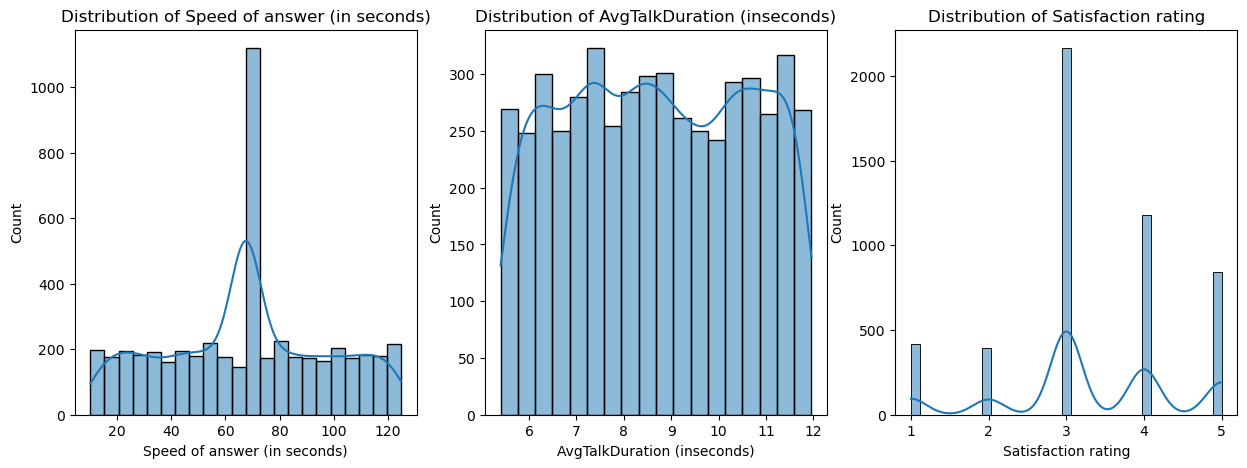

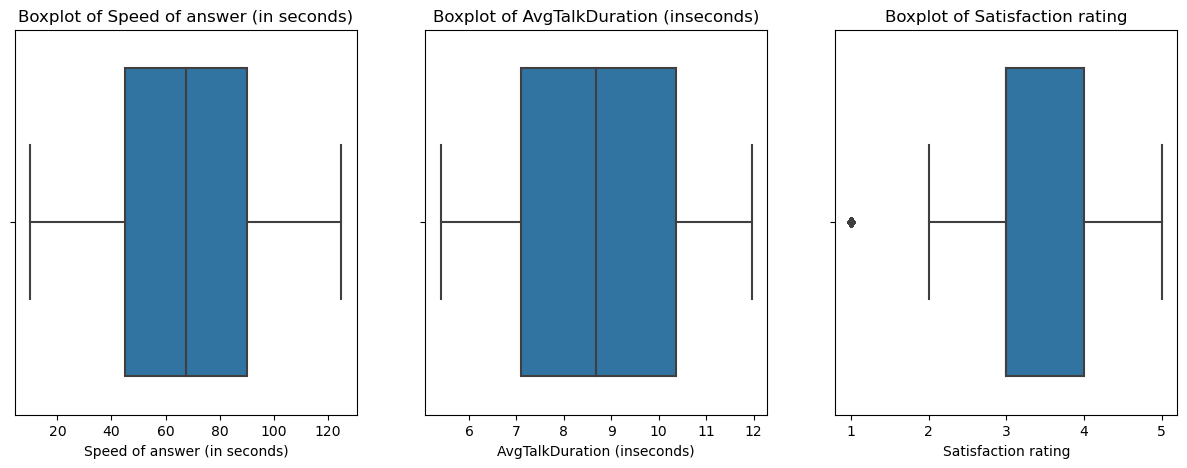

In [214]:
# Step 3.3 : Distributions of Key Variables

numerical_cols = ["Speed of answer (in seconds)", "AvgTalkDuration (inseconds)", "Satisfaction rating"]

plt.figure(figsize=(15, 5))
#enumerate(iterable, start=0)
for i, col in enumerate(numerical_cols,1):
    plt.subplot(1, 3, i)
    # subplot(rows,columns,index) => it starts from 1 only, does not identify 0
    sns.histplot(data[col], kde=True) #Kernel Density Estimation (KDE)
    plt.title(f"Distribution of {col}")

plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.show()

##### Understanding the Components of a Box Plot


- Median (Q2 - 50th percentile): The middle value of the dataset (bold line inside the box).
- First Quartile (Q1 - 25th percentile): The value below which 25% of the data lies (left edge of the box).
- Third Quartile (Q3 - 75th percentile): The value below which 75% of the data lies (right edge of the box).
- Interquartile Range (IQR): The middle 50% of data, calculated as Q3 - Q1 (size of the box).
- Whiskers: The "tails" extending from the box, representing the minimum and maximum values within 1.5 * IQR from Q1 and Q3.

In [224]:
# Step 3.4 : Solving KPI'set

# KPI 1: Call Answer Rate (%)
'''This KPI measures the percentage of calls that were answered out of the total calls received. It helps assess how efficient the call center is at handling incoming calls.'''

total_calls=len(data)

answered_calls=data["Answered (Y/N)"].value_counts()["Y"]

call_answer_rate = (answered_calls/total_calls)*100

print(call_answer_rate)

# The call_answer_rate is only 81.08% hence call center is not so efficient




81.08


In [238]:
# KPI 2: Average Speed of Answer (ASA)

'''This KPI measures the average time (in seconds) it takes for an agent to answer a call.
A lower ASA means that customers are getting assistance quickly, leading to higher satisfaction. '''

calls_answered = data[data["Answered (Y/N)"]=="Y"]
calls_answered["Speed of answer (in seconds)"].mean()

# This is not efficient as it usually takes above a minute to answer the call.


67.52072027627035

/Users/vaishnavipullakhandam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Speed of Answer for Answered Calls')

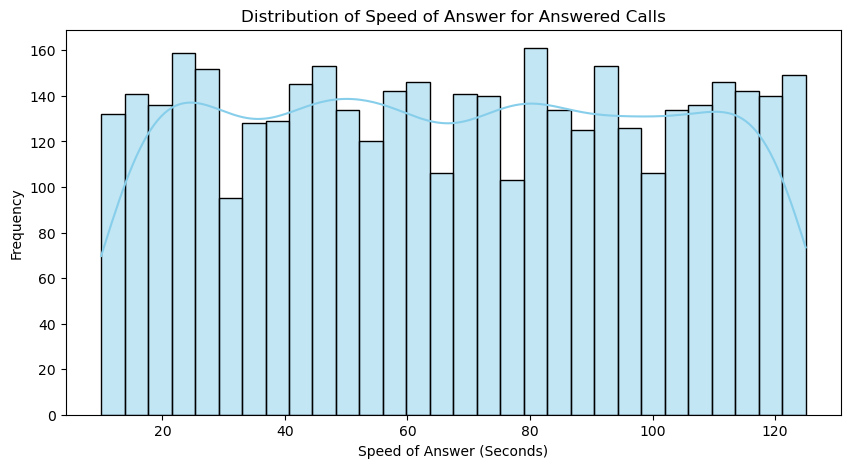